In [374]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = {
    'axes.labelsize' : "large",
    'xtick.labelsize':'x-large',
    'legend.fontsize': 20,
    'figure.dpi':150,
    'figure.figsize':[25,7]
}
plot.rcParams.update(params)

In [375]:
data = pd.read_csv('train.csv')

In [376]:
print(data.shape)

(891, 12)


In [377]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [378]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [379]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [380]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [381]:
data['Died'] = 1-data['Survived']

<Axes: xlabel='Sex'>

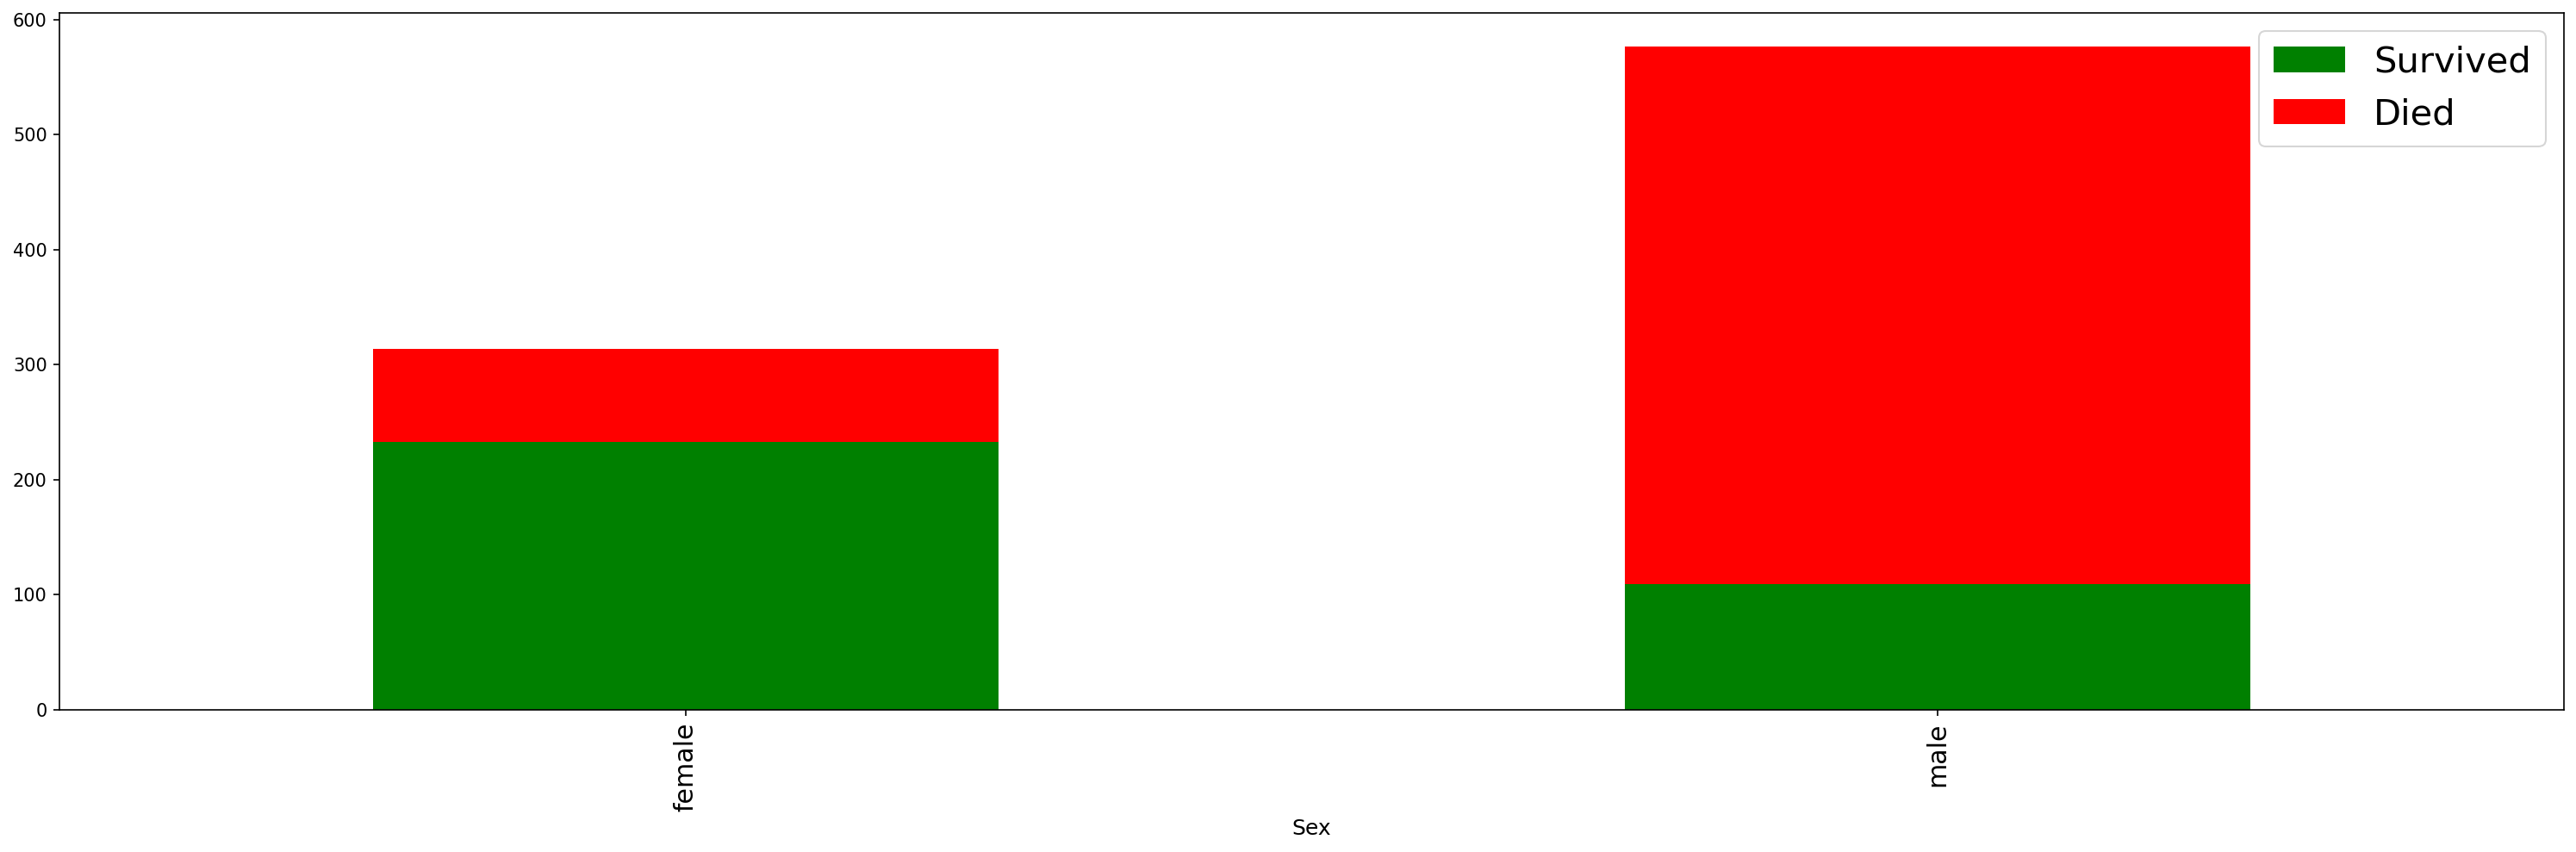

In [382]:
data.groupby('Sex')[['Survived','Died']].sum().plot(kind='bar',figsize = (25,7),
                                                      stacked = True, color =['g','r'] )

<Axes: xlabel='Sex'>

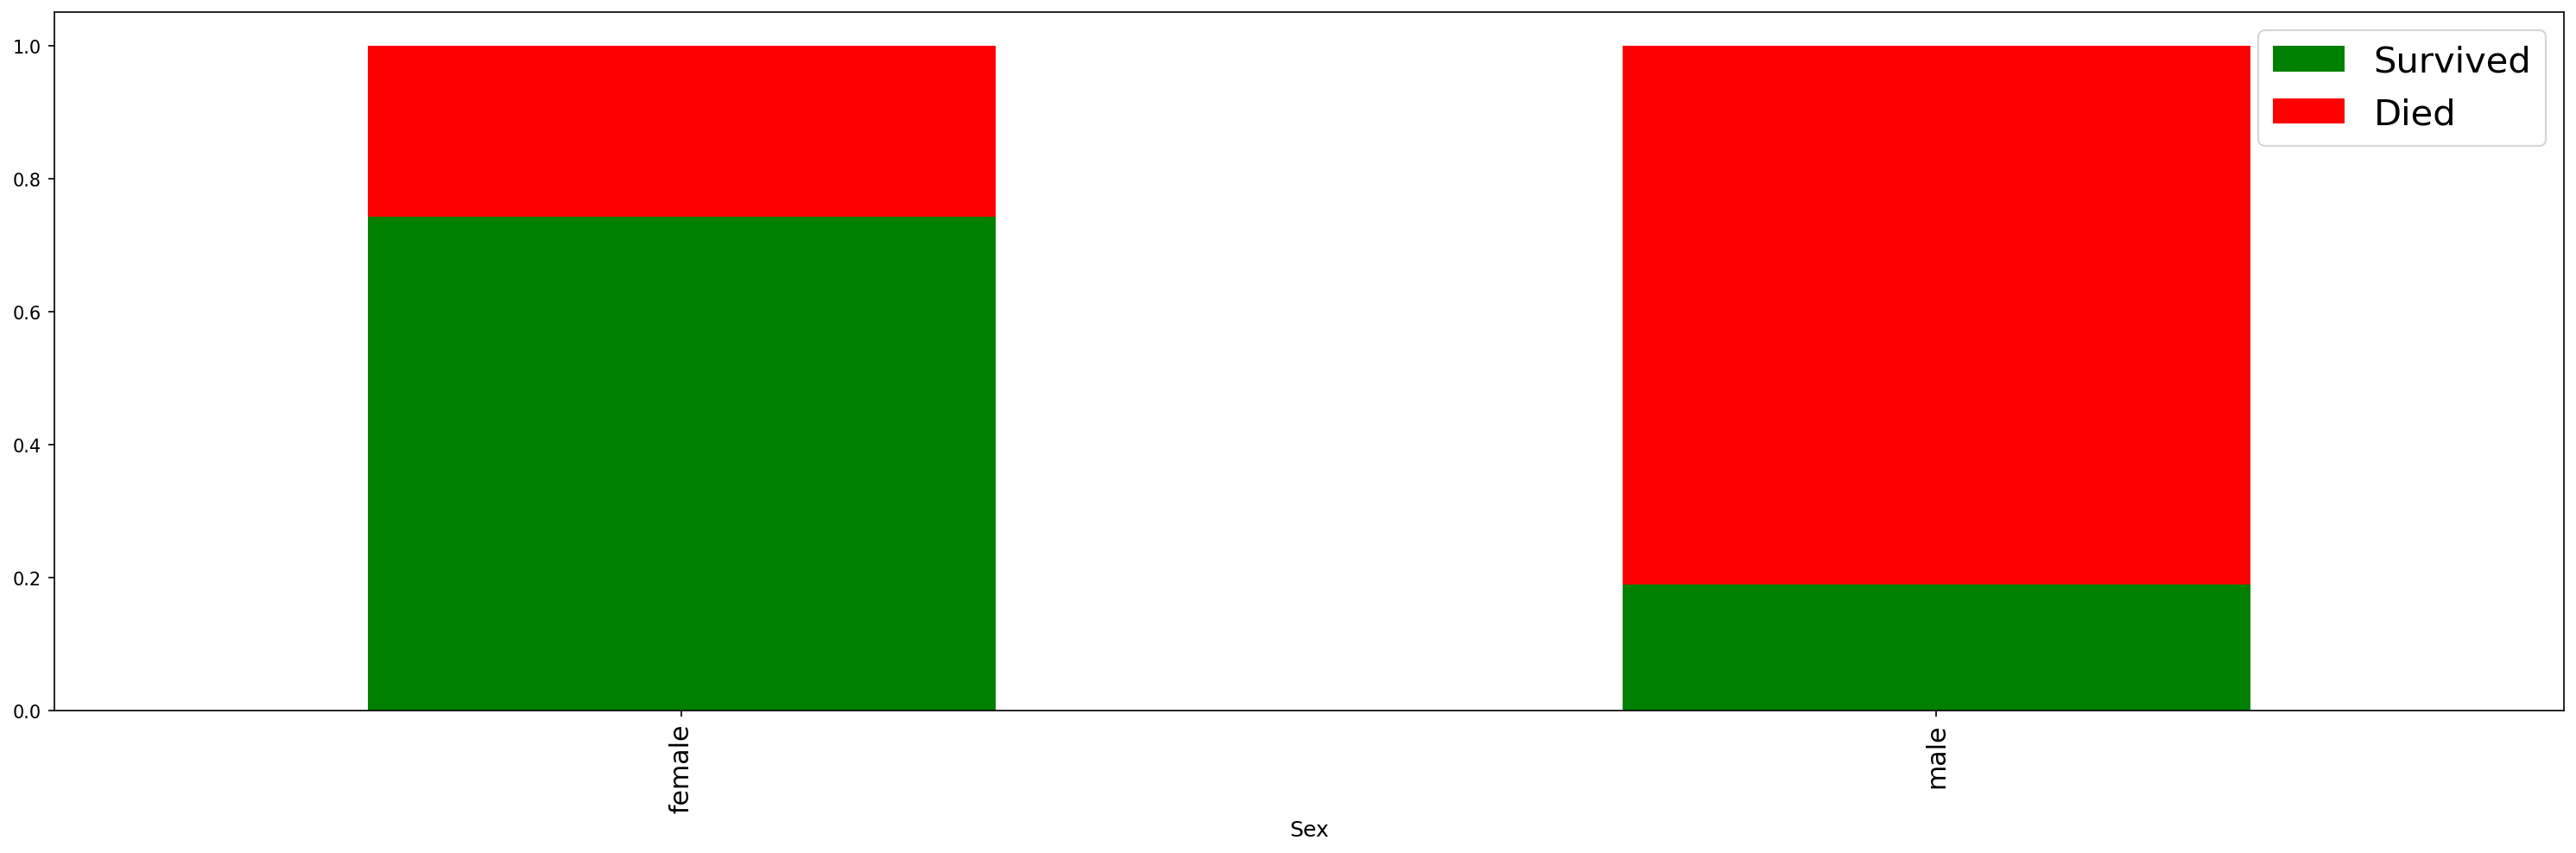

In [383]:
data.groupby('Sex')[['Survived', 'Died']].mean().plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r'])

<Axes: xlabel='Sex', ylabel='Age'>

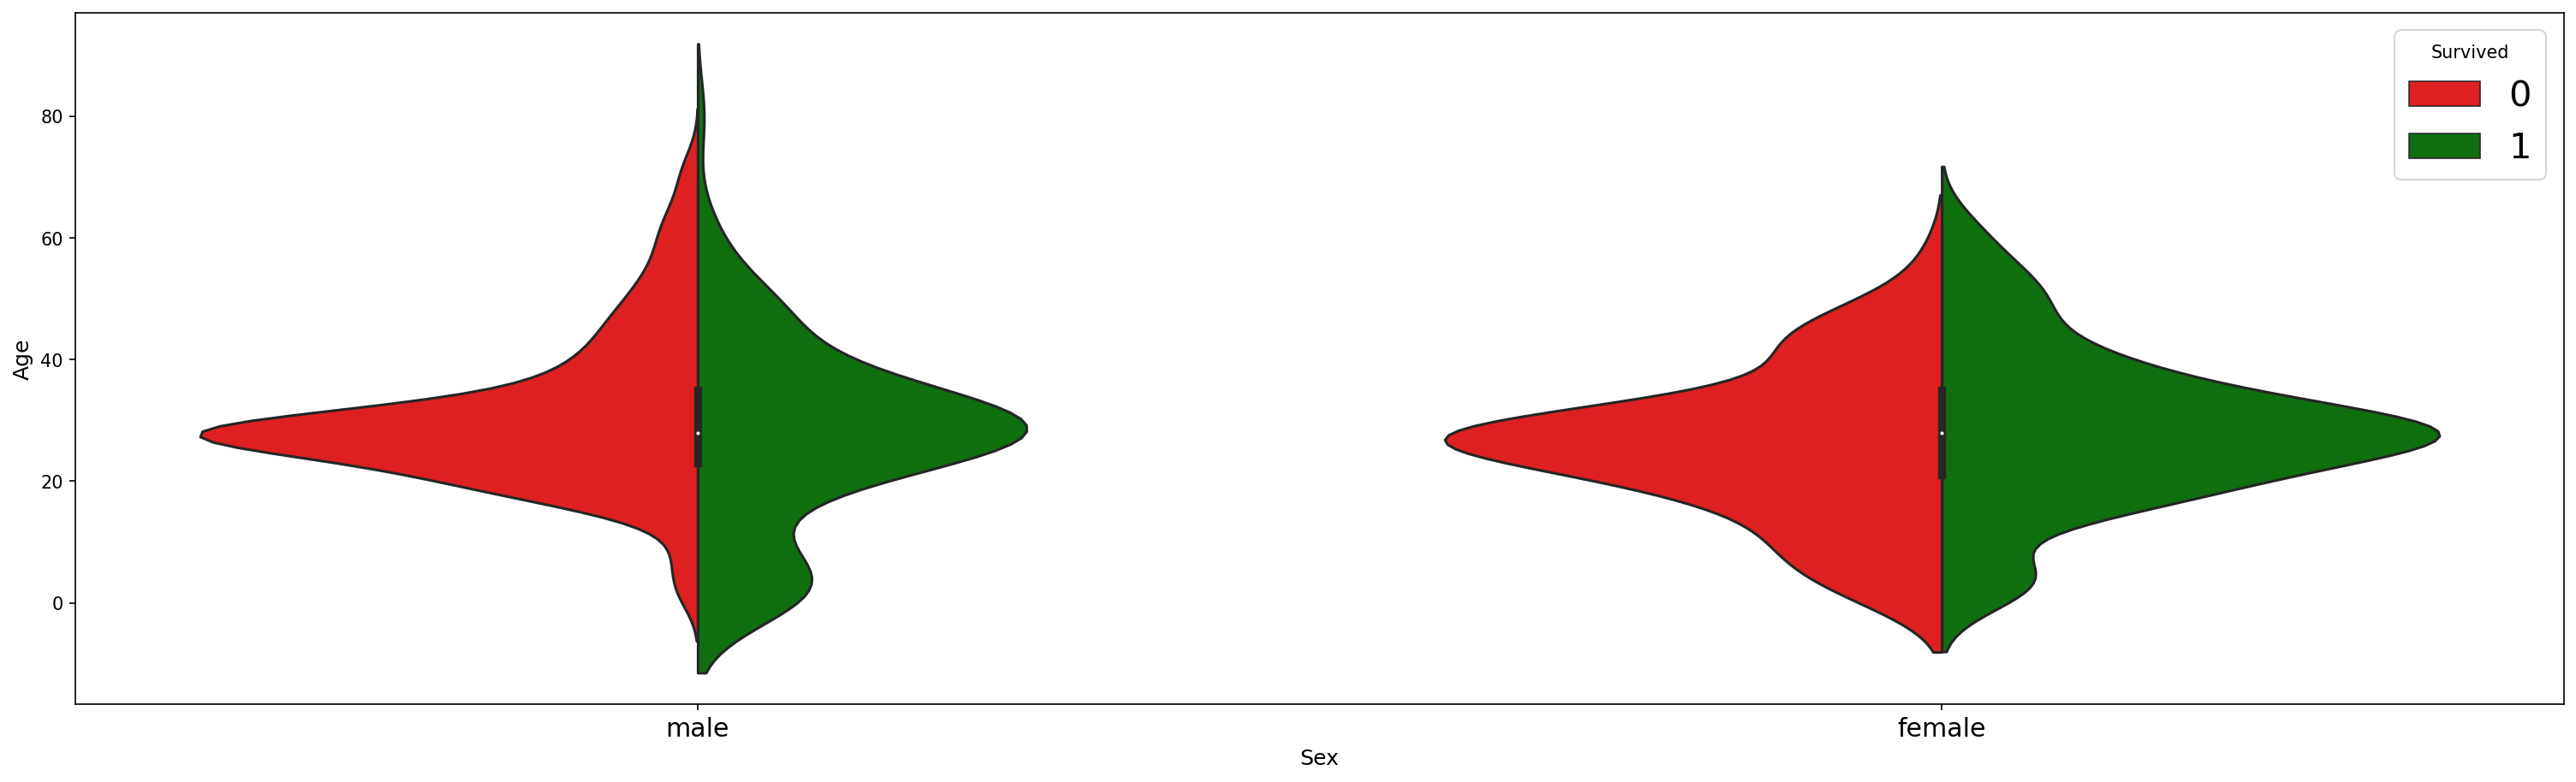

In [384]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x = 'Sex',y='Age',
              hue = 'Survived',data = data,
              split = True,
              palette = {0:'r',1:'g'})

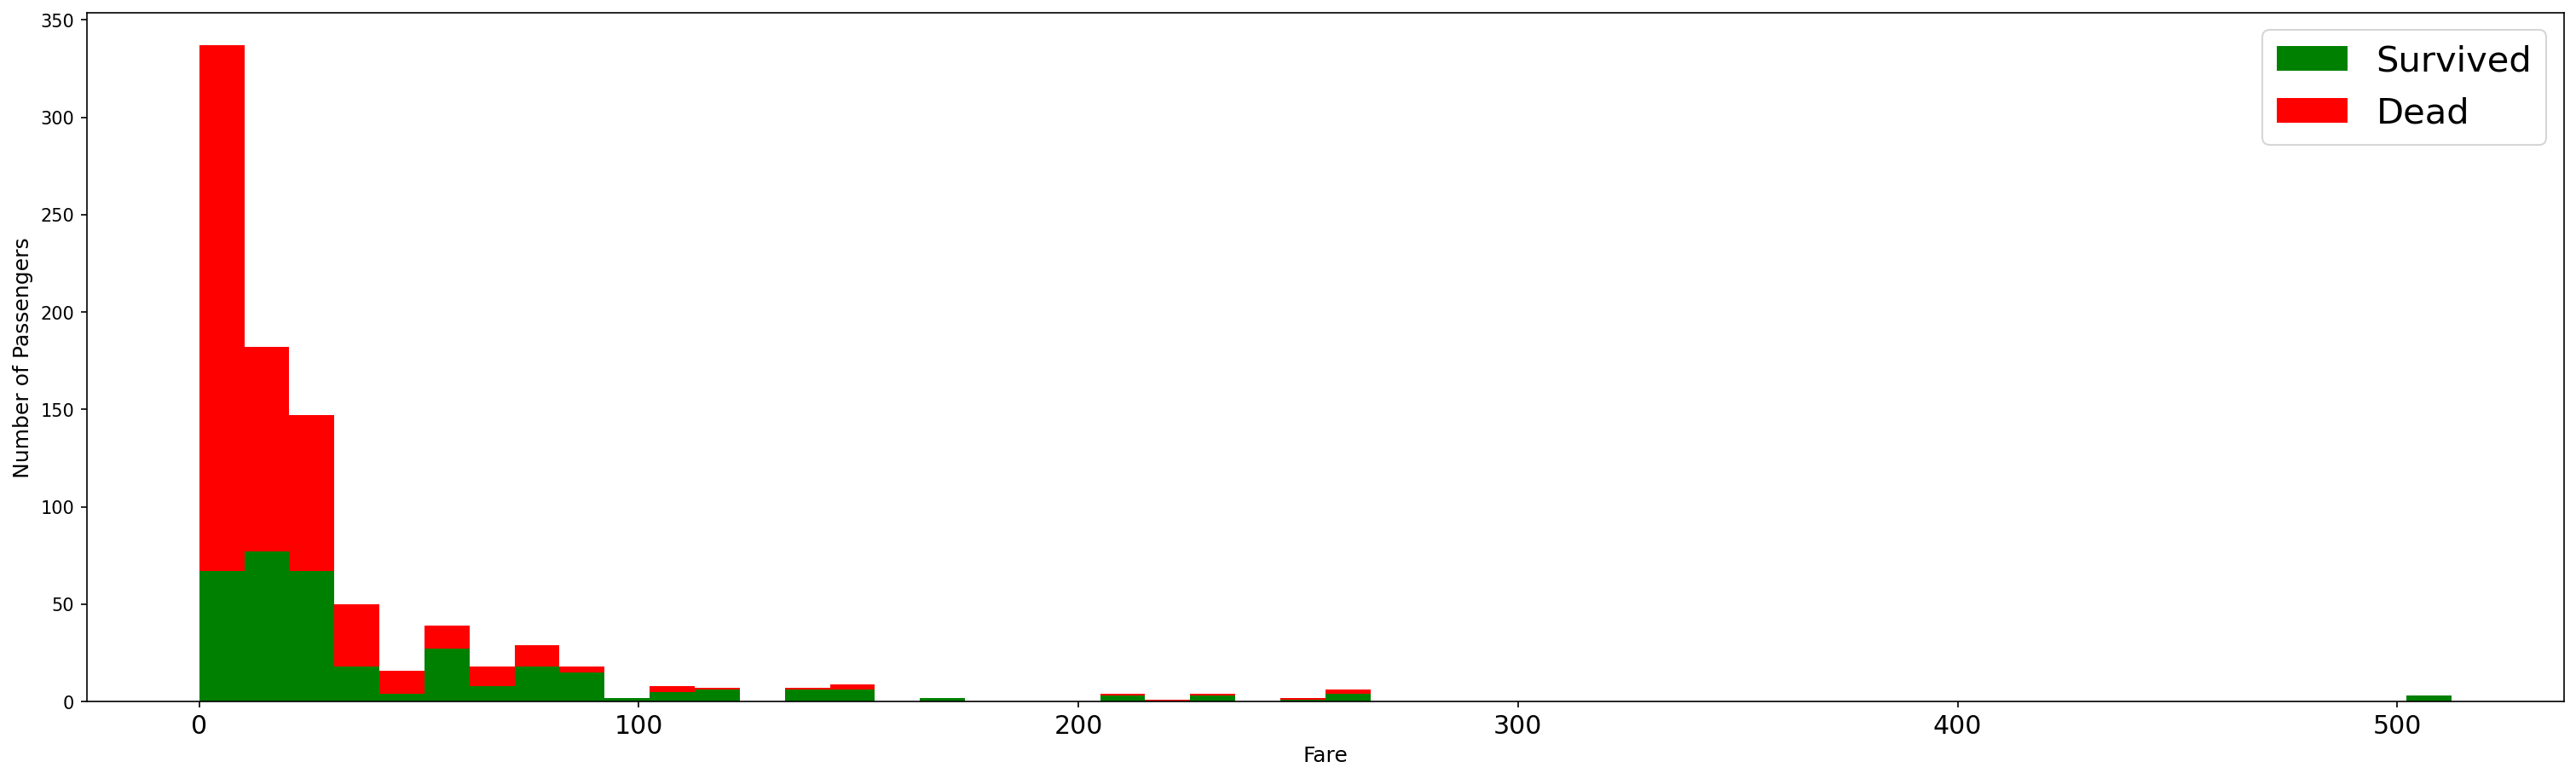

In [385]:
figure = plt.figure(figsize = (25,7))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],
         stacked = True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend();

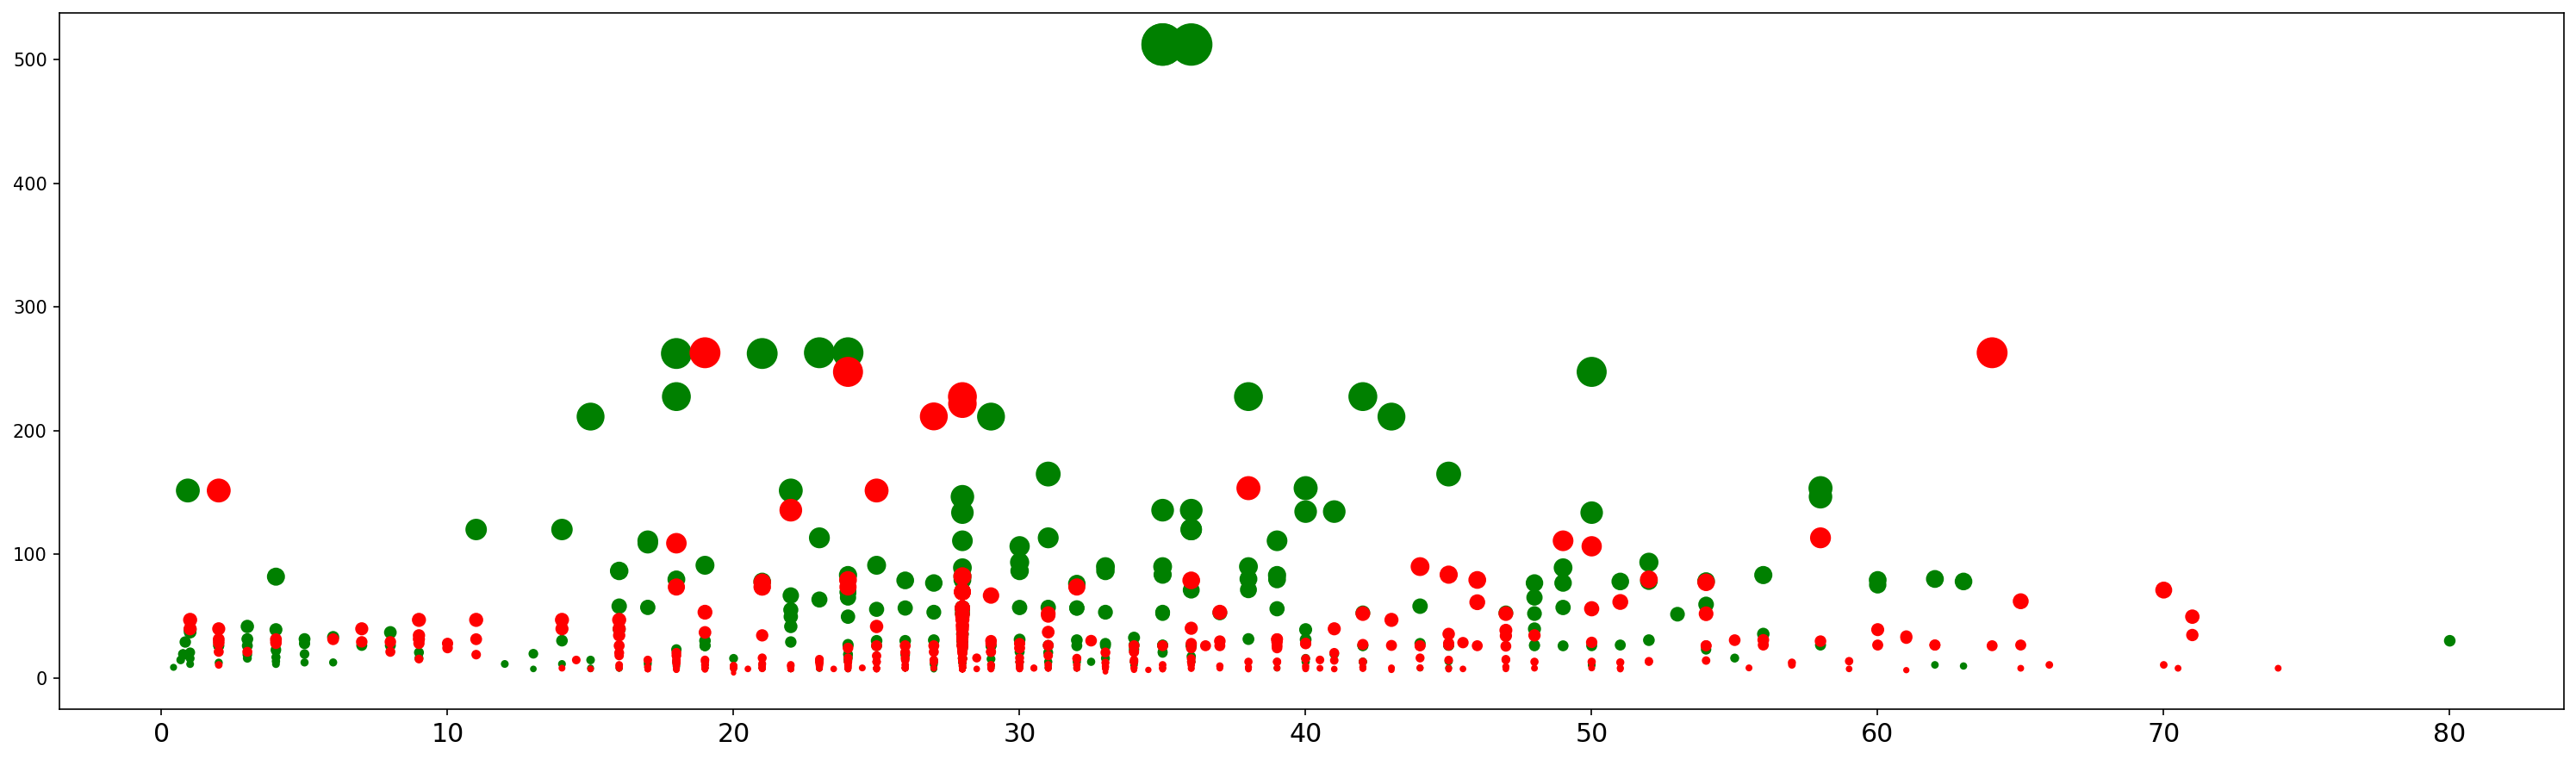

In [386]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

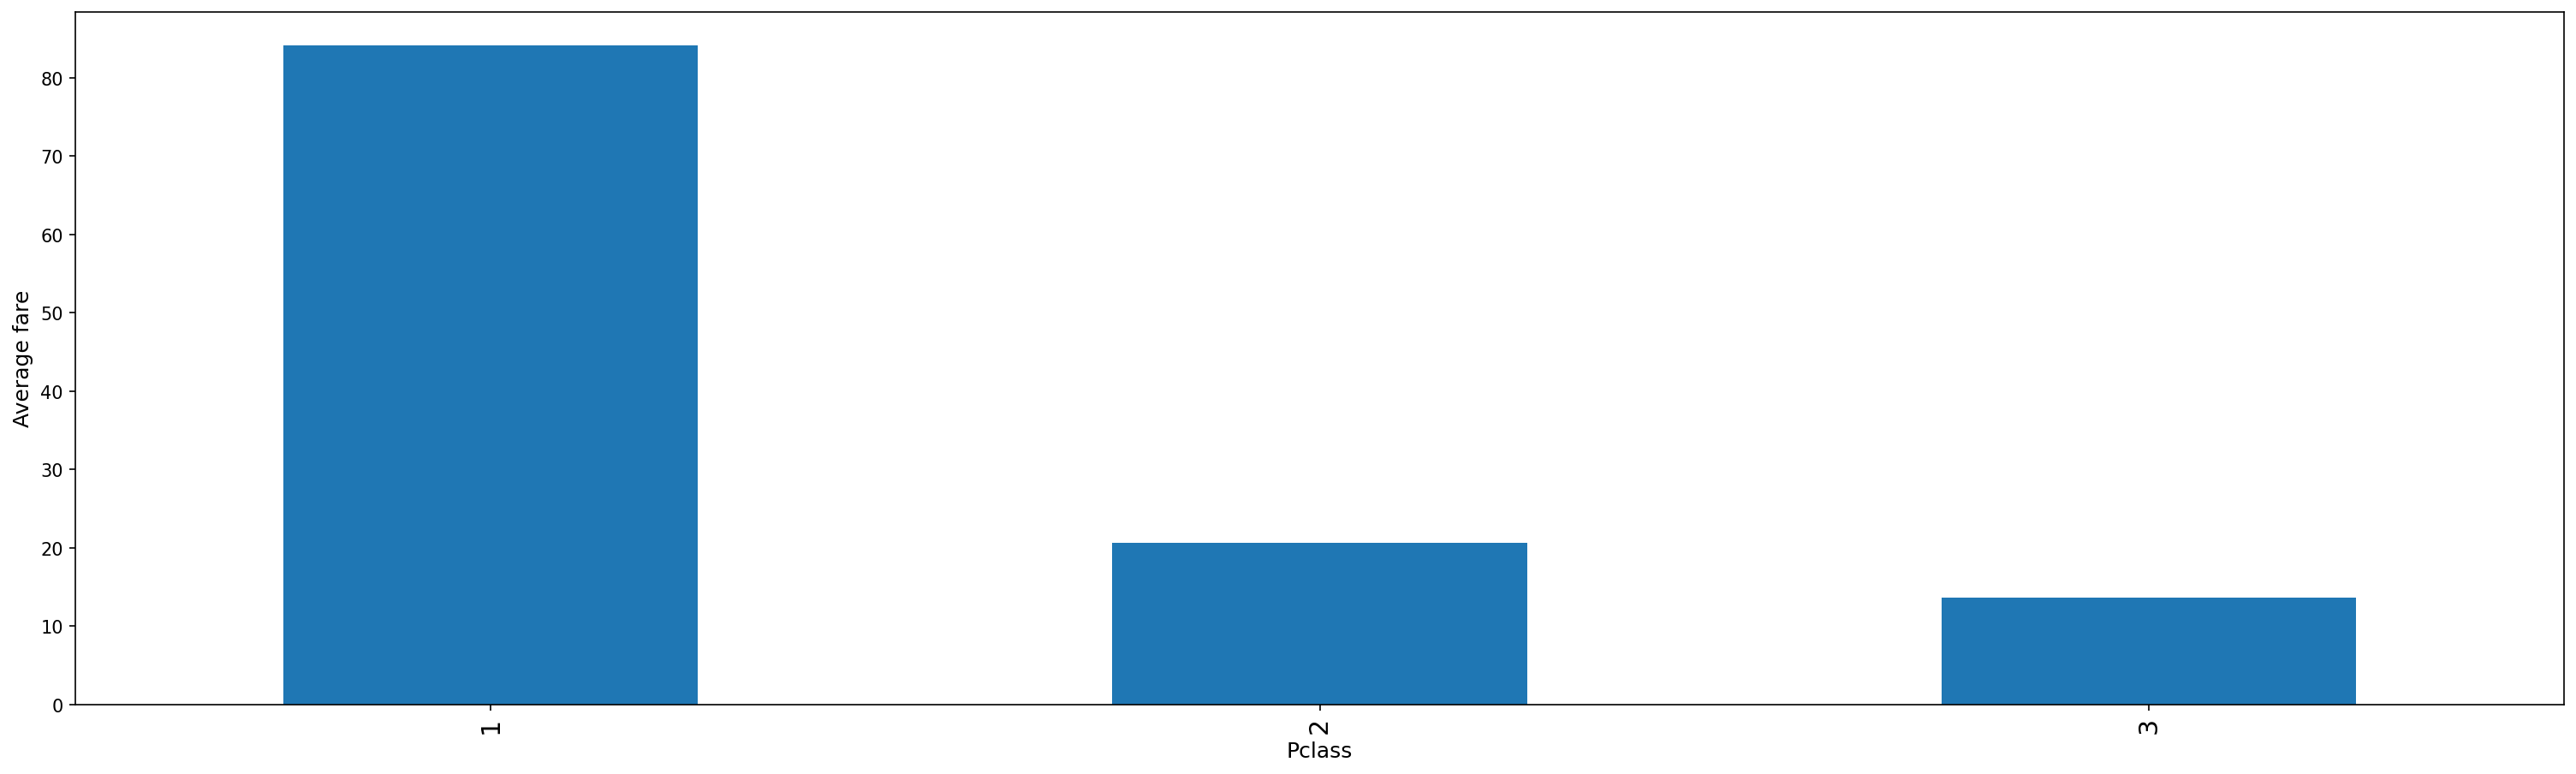

In [387]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass')['Fare'].mean().plot(kind = 'bar', figsize=(25, 7), ax = ax);

<Axes: xlabel='Embarked', ylabel='Fare'>

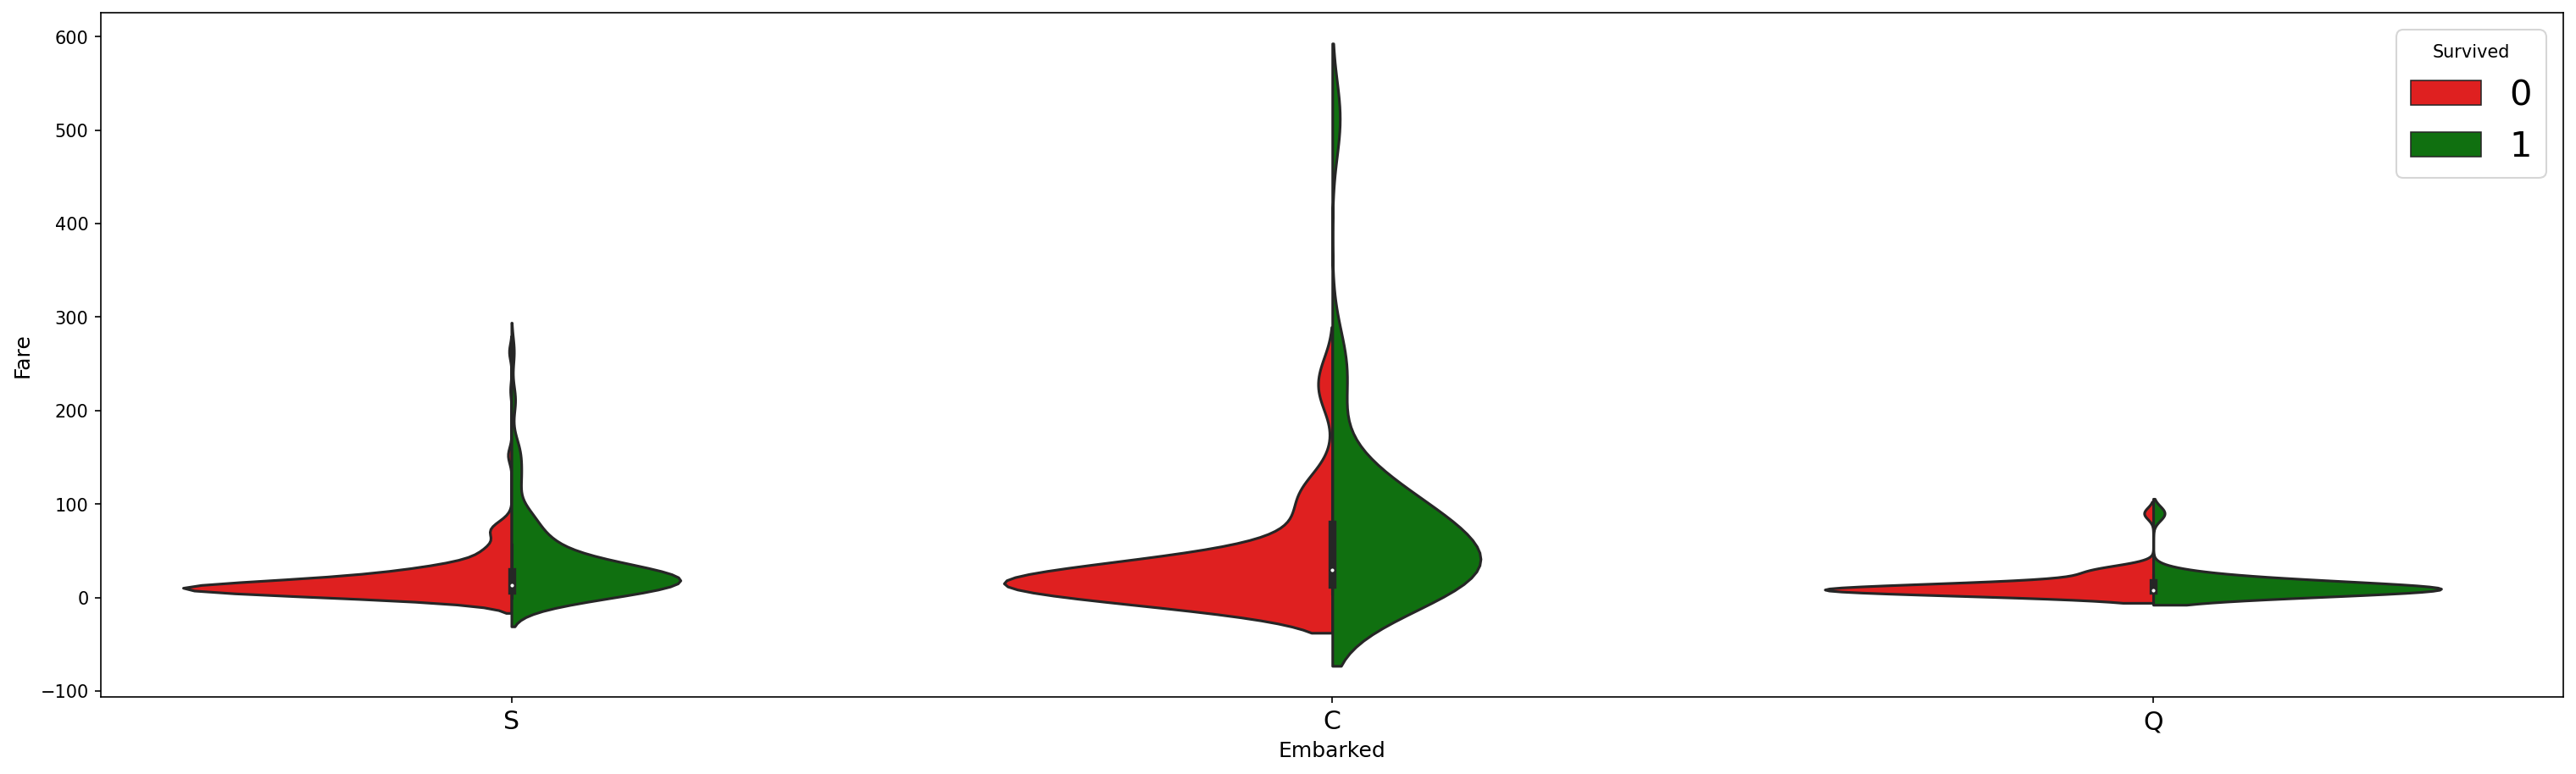

In [388]:
flg = plt.figure(figsize=(25,7)) 
sns.violinplot(x='Embarked',y='Fare',hue='Survived',data=data,split = True, palette = {0:'r',1:'g'})

### Feature Engineering

In [389]:
def status(feature):
    print('Processing',feature,': ok')

In [497]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], axis=1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = pd.concat([train,test], ignore_index = True)
    combined.reset_index(inplace=True,drop = True)
    combined.drop(['PassengerId'], inplace=True, axis=1)
    
    return combined

In [498]:
combined = get_combined_data()
print(combined.shape)

(1309, 10)


In [499]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [500]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Miss', 'Mme', 'Ms', 'Mlle', 'Col', 'Rev', 'Mrs', 'Dr', 'Capt', 'Mr', 'Lady', 'Jonkheer', 'Master', 'Sir', 'Major', 'Don', 'the Countess'}


In [501]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [502]:

combined = process_fares()

Processing fare : ok


In [503]:

def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    embarked_dummies = embarked_dummies.astype(int)
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

    

In [504]:
combined = process_embarked()

Processing embarked : ok


In [505]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [506]:
combined.drop('Name',axis = 1, inplace = True)

In [507]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [508]:
train_cabin, test_cabin = set(),set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [509]:
print(train_cabin)
print(test_cabin)

{'E', 'G', 'U', 'T', 'F', 'B', 'C', 'A', 'D'}
{'E', 'G', 'U', 'F', 'B', 'C', 'A', 'D'}


In [510]:

def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin') 
    cabin_dummies = cabin_dummies.astype(int)
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined


In [511]:
combined = process_cabin()

Processing cabin : ok


In [512]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,0,0,0,1


In [513]:
def process_sex():
    global combined
    combined['Sex'] = combined['Sex'].str.lower()
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0},na_action = 'ignore')
    combined['Sex'] = combined['Sex'].fillna(value = -1)
    status('Sex')
    return combined

In [514]:
combined = process_sex()


Processing Sex : ok


In [515]:
def process_pclass():
    global combined
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix = 'Pclass')
    pclass_dummies = pclass_dummies.astype(int)
    combined = pd.concat([combined,pclass_dummies],axis=1)
    combined.drop('Pclass',axis=1,inplace= True)
    status('Pclass')
    return combined

In [516]:
combined = process_pclass() 

Processing Pclass : ok


In [517]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(),ticket)
    ticket = list(filter(lambda t : not t.isdigit(),ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [518]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))


In [519]:
print(len(tickets))

37


In [520]:
def process_ticket():
    global combined
    def cleanTicket(ticket):
        ticket = ticket.replace('/','')
        ticket = ticket.replace('.','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : t.strip(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'

    # Extracting dummy variables from tickets:
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix = 'Ticket')
    tickets_dummies = tickets_dummies.astype(int)
    combined = pd.concat([combined,tickets_dummies], axis = 1)
    combined.drop('Ticket', inplace = True , axis = 1)

    status('Ticket')
    return combined 

In [521]:
combined = process_ticket()

Processing Ticket : ok


In [522]:
def process_family():
    
    global combined
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

In [523]:
combined = process_family()

Processing family : ok


In [524]:
print(combined.shape)

(1309, 765)


In [525]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110469,Ticket_110489,Ticket_110564,Ticket_110813,Ticket_111163,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112051,Ticket_112052,Ticket_112053,Ticket_112058,Ticket_112059,Ticket_112277,Ticket_112377,Ticket_112378,Ticket_112379,Ticket_112901,Ticket_113028,Ticket_113038,Ticket_113043,Ticket_113044,...,Ticket_7546,Ticket_7548,Ticket_7552,Ticket_7553,Ticket_7598,Ticket_7935,Ticket_8471,Ticket_8475,Ticket_9232,Ticket_9234,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [553]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.impute import  SimpleImputer

In [527]:
def compute_score(clf,X,y,scoring = 'accuracy'):
    xval = cross_val_score(clf,X,y,cv=5,scoring = scoring)
    return np.mean(xval)

In [542]:
def recover_train_test_target():
    global combined
    targets = pd.read_csv('train.csv', usecols = ['Survived'])['Survived']
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    imputer = SimpleImputer(strategy='mean')

    train_imputed = imputer.fit_transform(train)
    test_imputed = imputer.transform(test)

    train = pd.DataFrame(train_imputed, columns = train.columns)
    test = pd.DataFrame(test_imputed, columns = test.columns)
    
    return train, test, targets

In [543]:
train,test,targets = recover_train_test_target()

In [544]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [545]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance']=clf.feature_importances_
features.sort_values(by=['importance'],ascending=True,inplace = True)
features.set_index('feature',inplace=True)

<Axes: ylabel='feature'>

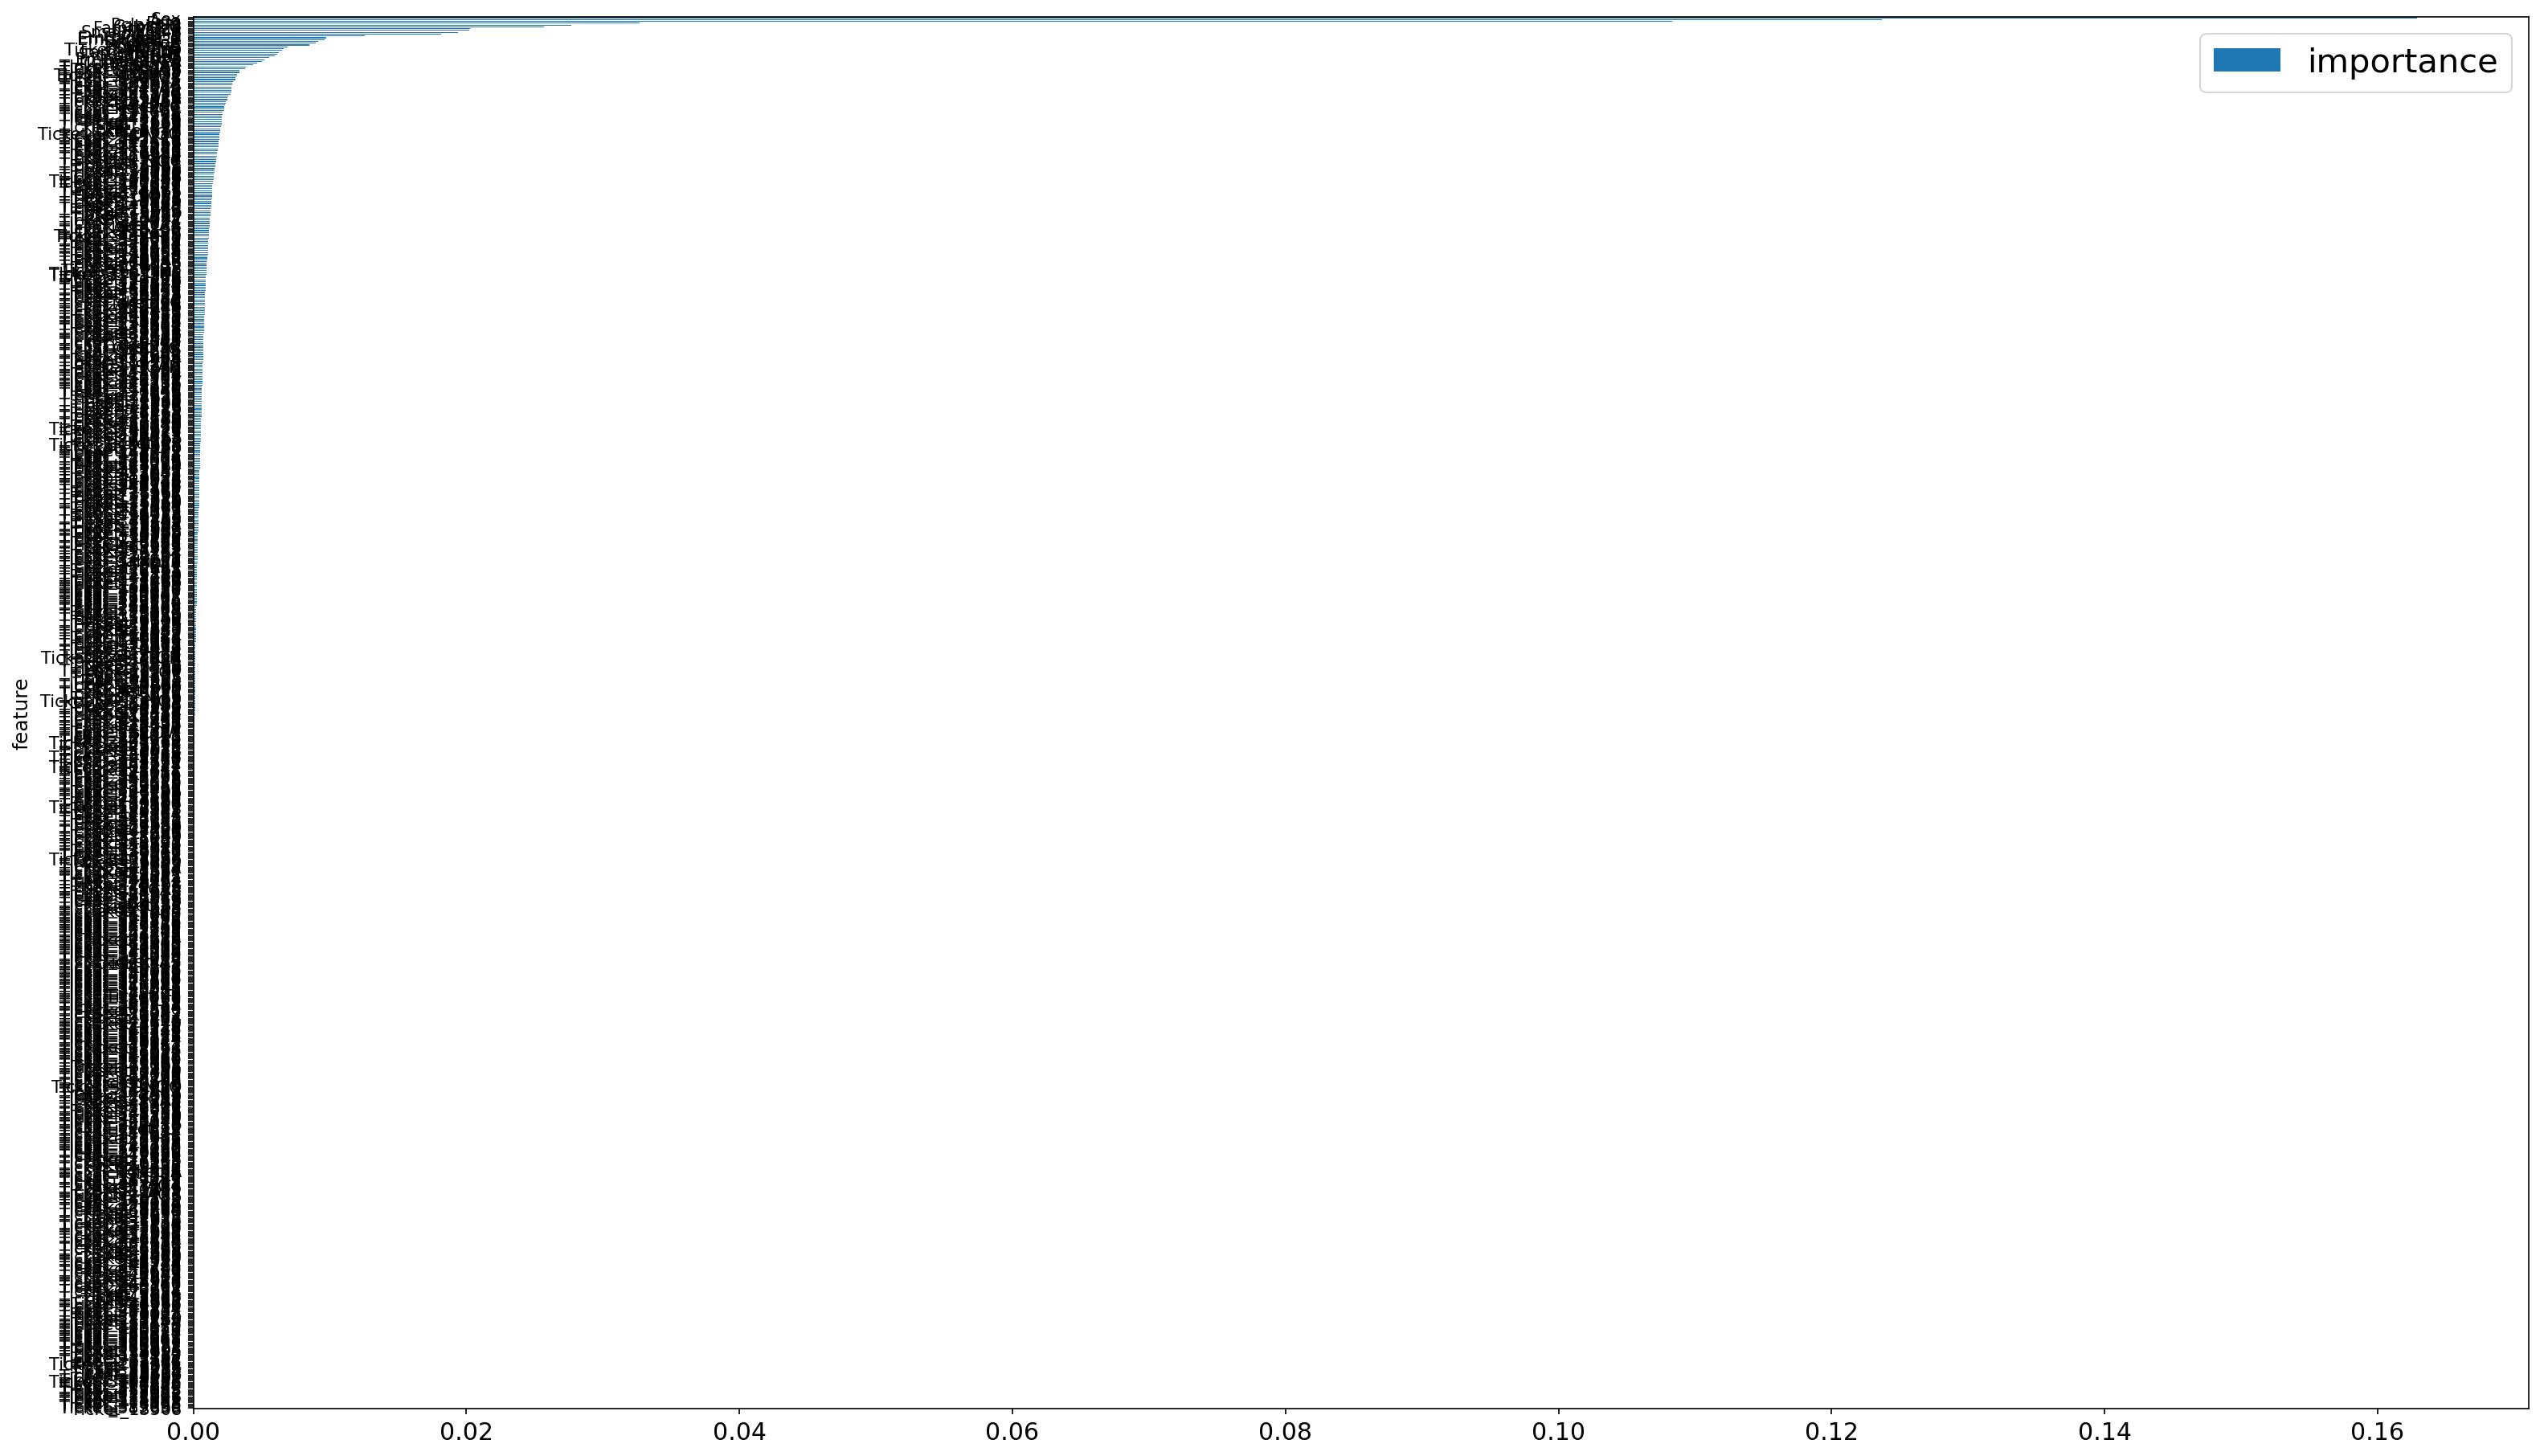

In [571]:
features.plot(kind = 'barh',figsize=(25,15))

In [549]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 102)


In [550]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 102)


### Different Base Models

In [554]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [560]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf = model , X= train_reduced, y= targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8114556525014123
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8193145439708743
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8238152030632101
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8271671583704727
****


In [561]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [564]:
import os

# Create the 'predictions' directory if it doesn't exist
if not os.path.exists('predictions'):
    os.makedirs('predictions')

In [565]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./predictions/gridsearch_rf.csv', index=False)